In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cookies = pd.read_csv("../data/cookies.csv")

In [30]:
cookies.head(3)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3


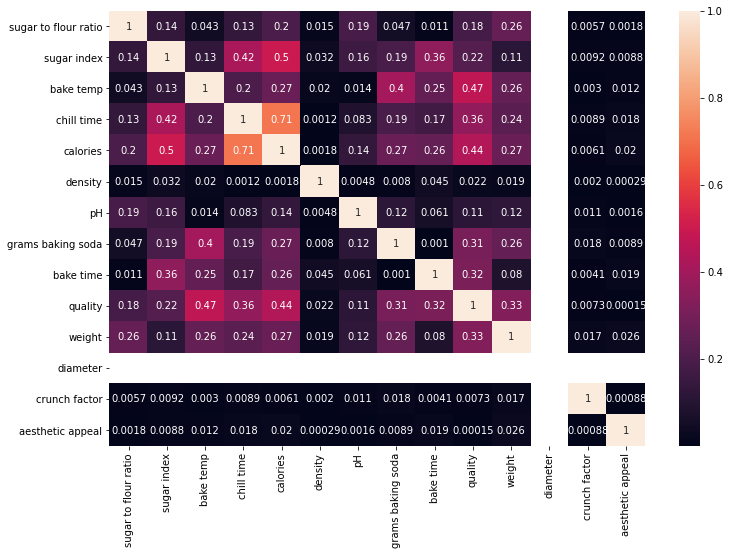

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

corrMatrix = cookies.corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [20]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

[]

In [32]:
cookies.drop(columns="diameter", inplace=True)

In [48]:
cookies.mixins.value_counts()

chocolate                         1893
raisins                           1200
chocolate, oats                    749
nuts, chocolate                    521
nuts,raisins                       333
nuts, oats, chocolate              295
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [45]:
cookies_validation["mixins"].value_counts()

chocolate                         332
raisins                           198
chocolate, oats                   121
nuts, chocolate                    69
nuts,raisins                       28
nuts, oats, chocolate              17
nuts, oats                          6
raisins, oats                       3
chocolate, peanut butter            2
peanut butter                       2
chocolate, oats, peanut butter      1
Name: mixins, dtype: int64

In [36]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  mixins                5196 non-null   object 
 13  crunch factor         5198 non-null   float64
 14  aesthetic appeal      5198 non-null   int64  
dtypes: float64(10), int64

In [41]:
cookies.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'mixins', 'crunch factor',
       'aesthetic appeal'],
      dtype='object')

In [42]:
cookies["aesthetic appeal"].value_counts()

3    5195
4       3
Name: aesthetic appeal, dtype: int64

In [38]:
cookies_testing = cookies.select_dtypes(["float64", "int64"])

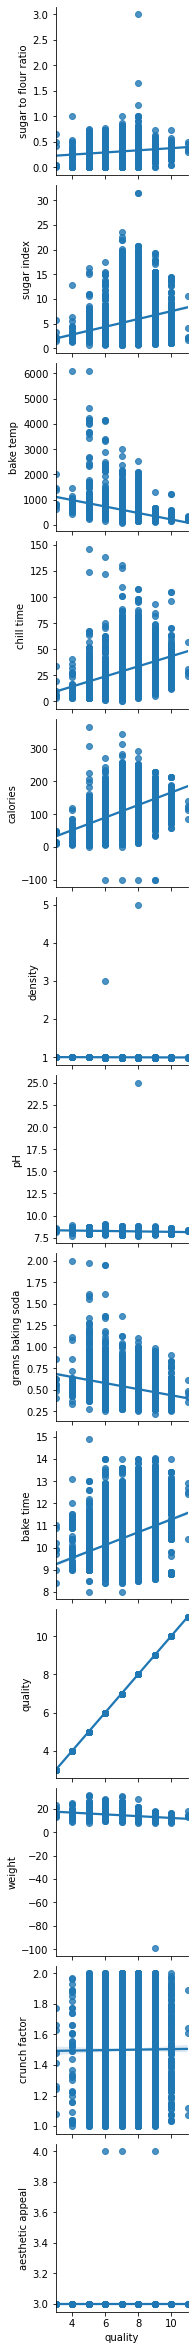

In [40]:
sns.pairplot(data=cookies_testing, y_vars=cookies_testing.columns, x_vars='quality', kind='reg')

In [43]:
cookies_validation = pd.read_csv("../data/cookies_validate.csv")

cookies_validation.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,0.67,9.7,0,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,0.44,10.0,0,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,0.53,10.0,0,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,0.46,10.9,0,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,0.44,9.1,0,melted,14.8,7,chocolate,1.51,3


In [54]:
cookies["mixins"].value_counts()

chocolate                         1893
raisins                           1200
chocolate, oats                    749
nuts, chocolate                    521
nuts, raisins                      333
nuts, oats, chocolate              295
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [53]:
cookies["mixins"] = cookies["mixins"].str.replace("nuts,raisins", "nuts, raisins")

In [57]:
cookies_validation["mixins"] = cookies_validation["mixins"].str.replace("nuts,raisins", "nuts, raisins")